In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation


Bad key savefig.frameon in file C:\Users\moniq\anaconda3\envs\projectenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\moniq\anaconda3\envs\projectenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\moniq\anaconda3\envs\projectenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You 

In [4]:
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [5]:
tickers1 = ['GCCHX', 'SPYX', 'ESGD']
tickers2 = ['CTEC', 'CRBN', 'EFAX']
tickers3 = ['ETHO', 'FAN']

# These are the tickers we discussed that have data that can be pulled from Alapaca. I havent tried other API's yet. 
tickersfin = ['SPYX', 'ESGD', 'CRBN', 'EFAX', 'ETHO', 'FAN']

timeframe = "1D"

# Pull 3.5 years of data: 
start_date = pd.Timestamp("2017-05-04", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-01-14", tz="America/New_York").isoformat()

# Ignore 
esg_data1 = api.get_barset(
    tickers1,
    timeframe,
    start=start_date,
    end=end_date
).df

# ignore 
esg_data2 = api.get_barset(
    tickers2,
    timeframe,
    start=start_date,
    end=end_date
).df

# ignore 
esg_data3 = api.get_barset(
    tickers3,
    timeframe,
    start=start_date,
    end=end_date
).df

# Here is the API call for the working tickers: 
esg_datafin = api.get_barset(
    tickersfin,
    timeframe,
    start=start_date,
    end=end_date
).df



# esg_data1.tail(10)
esg_datafin.tail(10)


CRBN                                         \
                             open      high       low     close   volume   
time                                                                       
2020-12-31 00:00:00-05:00  148.79  149.1200  148.4344  148.8900  11051.0   
2021-01-04 00:00:00-05:00  150.57  150.5700  147.3300  148.2600  22735.0   
2021-01-05 00:00:00-05:00  148.31  149.9300  148.3100  149.7400  18455.0   
2021-01-06 00:00:00-05:00  149.04  151.6100  148.9950  150.3299   8590.0   
2021-01-07 00:00:00-05:00  151.03  152.2400  151.0300  152.2400  10608.0   
2021-01-08 00:00:00-05:00  153.04  153.3450  152.2700  153.3400  14588.0   
2021-01-11 00:00:00-05:00  151.57  152.7000  151.5700  152.2499  34040.0   
2021-01-12 00:00:00-05:00  152.06  152.4900  151.5377  152.4160  11716.0   
2021-01-13 00:00:00-05:00  152.31  153.0900  152.3100  152.6800  10339.0   
2021-01-14 00:00:00-05:00  153.09  153.4784  152.5200  152.5200  15376.0   

                             EFAX                                     ...  \
                             open    high      low    close   volume  ...   
time                                                                  ...   
2020-12-31 00:00:00-05:00  78.250  78.250  77.8541  77.9700   2813.0  ...   
2021-01-04 00:00:00-05:00  79.320  79.320  77.9600  78.3900  14051.0  ...   
2021-01-05 00:00:00-05:00  78.660  79.108  78.4300  79.0800  10190.0  ...   
2021-01-06 00:00:00-05:00  79.320  79.790  79.3200  79.7000   6864.0  ...   
2021-01-07 00:00:00-05:00  79.230  79.780  79.2300  79.7800   5894.0  ...   
2021-01-08 00:00:00-05:00  80.225  80.380  79.8800  80.3000   5610.0  ...   
2021-01-11 00:00:00-05:00  78.900  79.510  78.9000  79.4169   8060.0  ...   
2021-01-12 00:00:00-05:00  79.165  79.540  79.0300  79.5400   4674.0  ...   
2021-01-13 00:00:00-05:00  79.660  79.740  79.3000  79.4841   2435.0  ...   
2021-01-14 00:00:00-05:00  79.540  80.268  79.5400  80.2680  11677.0  ...   

                             FAN                                       SPYX  \
                            open     high      low   close    volume   open   
time                                                                          
2020-12-31 00:00:00-05:00  23.38  23.3900  23.2200  23.300  133095.0  92.44   
2021-01-04 00:00:00-05:00  24.10  24.1700  23.8104  23.920  640086.0  93.28   
2021-01-05 00:00:00-05:00  24.01  24.1900  23.9501  24.165  443523.0  91.36   
2021-01-06 00:00:00-05:00  24.83  25.3700  24.6500  25.080  716286.0  91.36   
2021-01-07 00:00:00-05:00  25.80  26.0350  25.6845  26.015  676909.0  93.49   
2021-01-08 00:00:00-05:00  26.00  26.1400  25.7300  25.970  590216.0  94.25   
2021-01-11 00:00:00-05:00  25.31  25.5100  25.1500  25.470  481884.0  94.00   
2021-01-12 00:00:00-05:00  25.21  25.2156  24.9100  25.030  539505.0  93.93   
2021-01-13 00:00:00-05:00  25.21  25.2400  25.1000  25.100  373769.0  93.50   
2021-01-14 00:00:00-05:00  25.11  25.1100  24.8000  24.850  585176.0  94.17   

                                                           
                            high      low  close   volume  
time                                                       
2020-12-31 00:00:00-05:00  93.03  92.2200  93.02  14577.0  
2021-01-04 00:00:00-05:00  93.28  90.6400  91.51  40657.0  
2021-01-05 00:00:00-05:00  92.21  91.3600  92.05  21952.0  
2021-01-06 00:00:00-05:00  93.29  91.3600  92.52  32379.0  
2021-01-07 00:00:00-05:00  93.99  93.2500  93.84  37666.0  
2021-01-08 00:00:00-05:00  94.25  93.3133  94.20  28302.0  
2021-01-11 00:00:00-05:00  94.07  93.3925  93.73  38854.0  
2021-01-12 00:00:00-05:00  93.93  93.0600  93.65  15194.0  
2021-01-13 00:00:00-05:00  94.06  93.4100  93.83  17488.0  
2021-01-14 00:00:00-05:00  94.17  93.3696  93.44  20680.0  

[10 rows x 30 columns]

In [6]:
# Basic data 
esg_datafin.describe()

CRBN                                                    \
             open        high         low       close        volume   
count  929.000000  929.000000  929.000000  929.000000  9.290000e+02   
mean   119.050935  119.791873  118.294410  119.263777  1.436545e+04   
std     10.665972    9.801833   12.066609    9.900015  5.955026e+04   
min      0.000000   91.000000    0.000000   89.440000  1.320000e+02   
25%    112.660000  113.700000  111.990000  113.070000  5.014000e+03   
50%    117.820000  118.369000  117.390000  117.950000  7.231000e+03   
75%    123.070000  123.420000  122.570000  123.210000  1.279700e+04   
max    153.090000  153.478400  152.520000  153.340000  1.720440e+06   

             EFAX                                                     ...  \
             open        high         low       close         volume  ...   
count  880.000000  880.000000  880.000000  880.000000     880.000000  ...   
mean    68.649934   69.000934   68.410840   68.839216    4262.684091  ...   
std      5.686690    4.613316    6.140629    4.646381   11629.244065  ...   
min      0.000000   49.970000    0.000000   49.250000       1.000000  ...   
25%     66.352500   66.462775   66.240000   66.351000     620.000000  ...   
50%     69.400000   69.575000   69.240000   69.397500    1375.500000  ...   
75%     71.773500   72.012500   71.649675   71.908175    3442.500000  ...   
max     80.225000   80.380000   79.880000   80.300000  180001.000000  ...   

              FAN                                                    \
             open        high         low       close        volume   
count  931.000000  931.000000  931.000000  931.000000  9.310000e+02   
mean    13.970481   14.029242   13.889013   13.968169  6.826176e+04   
std      2.369840    2.382922    2.398088    2.372064  1.291487e+05   
min     10.580000   10.590000    0.000000   10.230000  1.310000e+02   
25%     12.820000   12.880000   12.775200   12.830000  1.524500e+04   
50%     13.244000   13.289900   13.200000   13.240000  2.745700e+04   
75%     13.985000   14.030000   13.915000   13.980000  6.137650e+04   
max     26.000000   26.140000   25.730000   26.015000  2.241606e+06   

             SPYX                                                     
             open        high         low       close         volume  
count  930.000000  930.000000  930.000000  930.000000     930.000000  
mean    70.507701   70.962778   69.982988   70.553122   23017.260215  
std      9.098296    8.532972    9.330577    8.470685   35091.283656  
min      0.000000   57.130000    0.000000   55.585000     165.000000  
25%     64.731050   65.000000   64.176250   64.670050    5925.750000  
50%     69.115000   69.310000   68.537200   68.895000   11517.500000  
75%     75.307500   75.862600   74.865000   75.235000   25362.250000  
max     94.250000   94.250000   93.410000   94.200000  449801.000000  

[8 rows x 30 columns]

In [7]:
esg_datafin.dropna()

CRBN                                         \
                             open      high       low     close   volume   
time                                                                       
2017-05-04 00:00:00-04:00  109.15  109.1500  106.2600  106.5300   2577.0   
2017-05-08 00:00:00-04:00  107.82  107.8200  107.3400  107.3400   7614.0   
2017-05-09 00:00:00-04:00  107.65  107.6999  107.3600  107.4299   4142.0   
2017-05-10 00:00:00-04:00  107.31  107.5200  107.3100  107.5000   9892.0   
2017-05-11 00:00:00-04:00  107.44  107.4400  106.8900  107.1500  14944.0   
2017-05-12 00:00:00-04:00  106.74  107.3200  106.6199  106.8900   5937.0   
2017-05-15 00:00:00-04:00  107.30  107.7900  107.0500  107.6570  17000.0   
2017-05-16 00:00:00-04:00  108.16  108.1680  107.8285  108.1300   9584.0   
2017-05-17 00:00:00-04:00  107.87  107.9700  106.4900  106.4900  16935.0   
2017-05-18 00:00:00-04:00  106.28  106.7100  106.1600  106.6300   7140.0   
2017-05-19 00:00:00-04:00  106.80  107.6600  106.8000  107.3600   5368.0   
2017-05-22 00:00:00-04:00  107.40  107.7207  107.4000  107.7207   2847.0   
2017-05-23 00:00:00-04:00  108.06  108.2300  107.5900  107.7800   8628.0   
2017-05-24 00:00:00-04:00  107.89  108.2000  107.7700  108.0700   4693.0   
2017-05-25 00:00:00-04:00  108.39  108.6800  108.3001  108.6300   5026.0   
2017-05-26 00:00:00-04:00  108.69  108.6900  108.4800  108.5300  10119.0   
2017-05-30 00:00:00-04:00  108.03  108.1875  107.9501  108.0100   6475.0   
2017-05-31 00:00:00-04:00  108.39  108.3900  107.9325  108.1200   7222.0   
2017-06-01 00:00:00-04:00  108.62  109.0400  108.1301  108.7500   9058.0   
2017-06-02 00:00:00-04:00  109.41  109.5100  109.0500  109.4360   9010.0   
2017-06-05 00:00:00-04:00  109.49  109.4900  109.0900  109.2600   5300.0   
2017-06-06 00:00:00-04:00  109.00  109.3000  109.0000  109.3000   6725.0   
2017-06-07 00:00:00-04:00  109.11  109.1900  108.8100  109.0300   5449.0   
2017-06-08 00:00:00-04:00  109.00  109.1275  108.7800  109.1100   8351.0   
2017-06-09 00:00:00-04:00  108.95  109.3800  108.2300  108.5500  11422.0   
2017-06-12 00:00:00-04:00  108.35  108.6300  108.1000  108.2599   5776.0   
2017-06-13 00:00:00-04:00  108.84  109.1300  108.6300  109.0300   8825.0   
2017-06-14 00:00:00-04:00  109.52  109.5200  108.7699  109.2368   4322.0   
2017-06-15 00:00:00-04:00  107.92  108.5800  107.9200  108.4900  30738.0   
2017-06-16 00:00:00-04:00  108.54  108.8800  107.9068  108.3710  19578.0   
...                           ...       ...       ...       ...      ...   
2020-12-02 00:00:00-05:00  144.97  145.8800  144.8700  145.8000  46927.0   
2020-12-03 00:00:00-05:00  146.02  146.4960  145.9000  145.9200   8885.0   
2020-12-04 00:00:00-05:00  146.55  147.3700  146.5500  147.3700  10645.0   
2020-12-07 00:00:00-05:00  146.79  147.2900  146.7900  146.7900  14644.0   
2020-12-08 00:00:00-05:00  146.55  147.5200  146.4000  147.3780   5093.0   
2020-12-09 00:00:00-05:00  147.74  147.7400  146.0250  146.6300   6260.0   
2020-12-10 00:00:00-05:00  146.41  147.0500  146.4100  146.9150  10098.0   
2020-12-11 00:00:00-05:00  145.98  146.4000  145.6400  146.1700  13181.0   
2020-12-14 00:00:00-05:00  146.27  146.5500  145.4400  145.4400   8760.0   
2020-12-15 00:00:00-05:00  145.94  146.8000  145.8600  146.8000  29057.0   
2020-12-16 00:00:00-05:00  147.01  147.2450  146.7900  146.9450  10156.0   
2020-12-17 00:00:00-05:00  148.06  148.2200  147.8200  148.0987   6976.0   
2020-12-18 00:00:00-05:00  148.30  148.3000  147.3800  147.8500   6578.0   
2020-12-21 00:00:00-05:00  145.44  146.9998  145.0000  146.8200  14633.0   
2020-12-22 00:00:00-05:00  146.64  146.7600  146.2500  146.4000   9165.0   
2020-12-23 00:00:00-05:00  147.11  147.5850  147.1100  147.2900  10745.0   
2020-12-24 00:00:00-05:00  147.11  147.3389  146.9040  147.1725   5852.0   
2020-12-28 00:00:00-05:00  148.46  148.4600  148.0700  148.2135  11269.0   
2020-12-29 00:00:00-05:00  149.37  149.4400  148.4700  148.8087   9938.0   
2

## Monte Carlo simulation for ESG portfolio.

In [8]:
# Configure a Monte Carlo simulation to forecast twenty years daily returns
MC_esg_20 = MCSimulation(
    portfolio_data = esg_datafin,
    num_simulation = 500,
    num_trading_days = 252*20
)

In [9]:
# Run simulation
MC_esg_20.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998116,0.999651,0.999375,0.995053,1.007370,0.994954,1.004676,1.000740,1.005585,1.004778,...,0.991345,0.992060,1.003805,0.999299,1.001440,1.002258,0.998353,0.998338,1.000134,0.996317
2,0.999174,1.003214,0.997763,0.999433,1.016056,0.999482,1.007396,1.006821,1.007802,1.006504,...,0.991957,0.983719,1.002085,1.002381,1.003802,1.001592,0.998783,0.996262,0.989941,0.996230
3,0.993058,1.014451,1.000272,1.010210,1.015484,0.999249,1.002616,1.003106,1.004643,1.010034,...,0.990046,0.978393,0.999494,1.003016,1.005676,0.999374,1.008567,1.000920,0.988891,1.000266
4,0.996921,1.024738,0.992608,1.017301,1.014781,1.005509,1.009474,1.002241,1.007254,0.997151,...,0.994590,0.977023,1.013666,1.008613,1.012461,0.997415,1.017584,0.996512,0.991382,0.994147
5,1.006676,1.019328,0.996570,1.016673,1.024752,1.001372,1.017187,1.003116,1.006977,0.999616,...,0.997179,0.983471,1.014778,1.008745,1.005524,1.001357,1.010891,0.993499,0.993867,0.990768
6,1.014575,1.013689,1.000343,1.017121,1.018327,1.000836,1.016683,1.011070,1.009043,1.013194,...,1.000877,0.974283,1.010983,1.006067,1.017050,1.009402,1.010604,0.988968,0.995807,1.002160
7,1.027657,1.015629,1.004840,1.019484,1.030703,1.010595,1.013710,1.008327,1.018677,1.016877,...,1.002523,0.972505,1.022348,1.006298,1.014614,1.019090,1.020207,0.988264,0.997797,0.999723
8,1.033261,1.020102,1.008195,1.016666,1.037316,1.006929,1.009259,1.011168,1.002918,1.013674,...,1.003894,0.973575,1.023980,0.998862,1.011755,1.015344,1.020139,0.985585,0.991372,0.993120
9,1.033637,1.021716,1.011386,1.011839,1.037492,1.006955,1.019656,1.011097,1.000389,1.013582,...,1.011915,0.972287,1.026977,0.997442,1.011539,1.007739,1.018835,0.988163,0.981413,0.991922


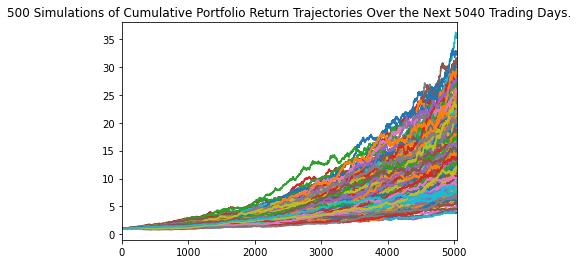

In [10]:
# Plot simulation outcomes
line_plot = MC_esg_20.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_esg20_sim_plot.png", bbox_inches="tight")

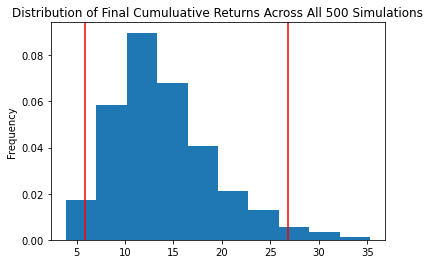

In [11]:
# Plot probability distribution and confidence intervals
dist_plot = MC_esg_20.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_esg20_dist_plot.png',bbox_inches='tight')

In [12]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_esg_20.simulated_return.mean(axis=1)),
    "median": list(MC_esg_20.simulated_return.median(axis=1)),
    "min": list(MC_esg_20.simulated_return.min(axis=1)),
    "max": list(MC_esg_20.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000567,1.000503,0.985109,1.020321
2,1.000998,1.001428,0.970130,1.025436
3,1.001437,1.001679,0.971859,1.029725
4,1.001752,1.002240,0.965614,1.035882


In [13]:
# Set initial investment
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl.head()

,mean,median,min,max
0,10000.000000,10000.000000,10000.000000,10000.000000
1,10005.674005,10005.032471,9851.092579,10203.213555
2,10009.978058,10014.283841,9701.303532,10254.359718
3,10014.368504,10016.785755,9718.594179,10297.254873
4,10017.522616,10022.401424,9656.135758,10358.819751


<AxesSubplot:title={'center':'Simulated Outcomes Behavior of ESG Funds Over the Next Year'}>

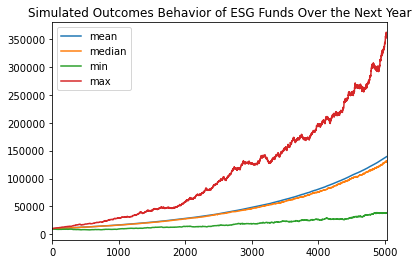

In [14]:
# Use the 'plot' function to create a chart of the simulated profits/losses
cumulative_pnl.plot(title="Simulated Outcomes Behavior of ESG Funds Over the Next Year")

In [15]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_esg_20.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             13.975397
std               5.268038
min               3.884507
25%              10.282212
50%              13.147379
75%              16.761985
max              35.298597
95% CI Lower      5.865583
95% CI Upper     26.793903
Name: 5040, dtype: float64


In [16]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in ESG funds
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next year will end within in the range of $58655.83 and $267939.03.


## Monte Carlo simulation for S&P 500 portfolio.

In [17]:
# Set up data to compare to the S&P 500 with 'SPY' ticker
tickers4 = ['SPY']

sp500_data = api.get_barset(
    tickers4,
    timeframe,
    start = start_date,
    end = end_date
).df

sp500_data.head()

SPY                                    
                             open      high     low   close    volume
time                                                                 
2017-05-04 00:00:00-04:00  238.83  238.9225  237.78  238.75  46170233
2017-05-05 00:00:00-04:00  239.18  239.7200  238.68  239.72  43733544
2017-05-08 00:00:00-04:00  239.76  239.9200  239.17  239.67  32087919
2017-05-09 00:00:00-04:00  239.96  240.1900  239.04  239.46  39723891
2017-05-10 00:00:00-04:00  239.38  239.8700  239.15  239.85  34222778

In [18]:
# Configure a Monte Carlo simulation to forecast twenty years daily returns for the S&P 500
MC_sp500_20 = MCSimulation(
    portfolio_data = sp500_data,
    num_simulation = 500,
    num_trading_days = 252*20
)

In [19]:
# Run simulation
MC_sp500_20.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994899,1.026020,1.007223,1.006076,1.007959,1.001573,1.004641,1.004147,0.997430,1.012017,...,1.007876,0.988724,1.000469,0.998184,1.004079,1.015315,0.988848,0.985243,1.016786,1.004379
2,0.992621,1.037492,1.019453,0.992459,1.041151,0.994005,1.007423,1.005869,0.995424,1.033650,...,1.011495,0.980230,1.004142,0.981026,1.004921,1.021027,0.993155,0.963584,1.013495,1.007172
3,1.016895,1.039398,1.020776,1.004023,1.025318,0.991085,1.015291,1.026045,0.997742,1.009897,...,1.019637,0.990038,0.994215,0.968021,1.005968,1.021632,0.992674,0.945762,1.033646,1.004449
4,1.045032,1.042683,1.034290,0.991783,1.019404,0.976894,1.026873,1.033887,0.990286,0.999492,...,1.034609,1.005976,0.993871,0.974333,0.995448,1.017785,0.999136,0.935700,1.040834,0.998757
5,1.101013,1.044957,1.053369,1.003165,1.048987,0.989819,1.043807,1.050960,0.998481,1.034668,...,1.043164,0.975977,0.983718,0.970377,1.023645,1.029160,1.003182,0.951972,1.043253,1.000841
6,1.128359,1.034726,1.049868,1.000461,1.044906,0.989868,1.039757,1.047007,0.987664,1.033778,...,1.061947,0.979221,0.991558,0.977209,1.011547,1.055037,0.991137,0.962303,1.070490,1.007974
7,1.113497,1.009681,1.063188,0.979811,1.034749,0.984342,1.035766,1.033540,0.988947,1.048987,...,1.076485,0.973227,0.994217,0.983476,1.007574,1.044089,1.011746,0.960673,1.077900,1.003267
8,1.097765,0.992273,1.083296,1.007178,1.020193,0.987736,1.014778,1.040674,0.994562,1.023433,...,1.063319,0.976943,1.004233,0.988540,1.026561,1.063013,1.023479,0.961729,1.066417,0.997302
9,1.091366,0.995422,1.096484,1.012973,1.026097,0.971003,1.014570,1.039358,0.988336,1.021226,...,1.071806,0.957676,0.990833,0.982168,1.014919,1.049999,1.030972,0.962873,1.071033,0.973435


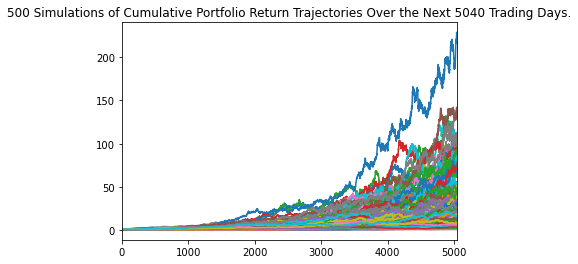

In [20]:
# Plot simulation outcomes
line_plot = MC_sp500_20.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_sp500_20_sim_plot.png", bbox_inches="tight")

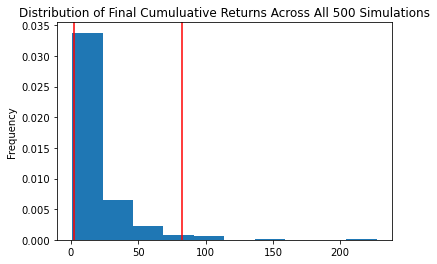

In [21]:
# Plot probability distribution and confidence intervals
dist_plot = MC_sp500_20.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_sp500_20_dist_plot.png',bbox_inches='tight')

In [22]:
# Compute summary statistics from the simulated daily returns
simulated_sp500returns_data = {
    "mean": list(MC_sp500_20.simulated_return.mean(axis=1)),
    "median": list(MC_sp500_20.simulated_return.median(axis=1)),
    "min": list(MC_sp500_20.simulated_return.min(axis=1)),
    "max": list(MC_sp500_20.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_sp500returns = pd.DataFrame(simulated_sp500returns_data)

# Display sample data
df_simulated_sp500returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000013,0.998842,0.967612,1.037599
2,1.000454,1.000441,0.942518,1.067631
3,1.000466,0.999824,0.933470,1.077798
4,1.000256,0.998070,0.915277,1.093725


In [23]:
# Set initial investment
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_sp500pnl = initial_investment * df_simulated_sp500returns

# Display sample data
cumulative_sp500pnl.head()

,mean,median,min,max
0,10000.000000,10000.000000,10000.000000,10000.000000
1,10000.132676,9988.422232,9676.115627,10375.988702
2,10004.536958,10004.409285,9425.183342,10676.308726
3,10004.658370,9998.235762,9334.696852,10777.975601
4,10002.560526,9980.703575,9152.768861,10937.253745


<AxesSubplot:title={'center':'Simulated Outcomes Behavior of S&P 500 Funds Over the Next Year'}>

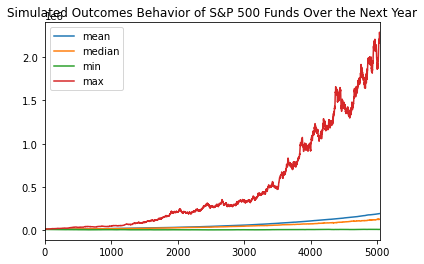

In [24]:
# Use the 'plot' function to create a chart of the simulated profits/losses
cumulative_sp500pnl.plot(title="Simulated Outcomes Behavior of S&P 500 Funds Over the Next Year")

In [25]:
# Fetch summary statistics from the Monte Carlo simulation results
tblsp500 = MC_sp500_20.summarize_cumulative_return()

# Print summary statistics
print(tblsp500)

count           500.000000
mean             19.165301
std              21.911010
min               0.853138
25%               6.953965
50%              12.555409
75%              22.974543
max             226.918933
95% CI Lower      2.004034
95% CI Upper     82.787446
Name: 5040, dtype: float64


In [26]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in S&P 500 funds
ci_lower = round(tblsp500[8]*10000,2)
ci_upper = round(tblsp500[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next year will end within in the range of $20040.34 and $827874.46.


## Combining ESG portfolio returns and S&P 500 portfolio returns.

In [27]:
esg_datafin.head()

CRBN                                        EFAX  \
                             open      high     low     close  volume    open   
time                                                                            
2017-05-04 00:00:00-04:00  109.15  109.1500  106.26  106.5300  2577.0  67.820   
2017-05-05 00:00:00-04:00  106.84  107.4400  106.83  107.2100  5818.0     NaN   
2017-05-08 00:00:00-04:00  107.82  107.8200  107.34  107.3400  7614.0  68.102   
2017-05-09 00:00:00-04:00  107.65  107.6999  107.36  107.4299  4142.0  68.050   
2017-05-10 00:00:00-04:00  107.31  107.5200  107.31  107.5000  9892.0  67.860   

                                                           ...    FAN  \
                             high     low   close  volume  ...   open   
time                                                       ...          
2017-05-04 00:00:00-04:00  68.830  67.800  67.800  3247.0  ...  13.14   
2017-05-05 00:00:00-04:00     NaN     NaN     NaN     NaN  ...  13.25   
2017-05-08 00:00:00-04:00  69.055  68.102  68.925  2549.0  ...  13.31   
2017-05-09 00:00:00-04:00  68.050  67.960  67.970   194.0  ...  13.31   
2017-05-10 00:00:00-04:00  67.940  67.860  67.930   127.0  ...  13.24   

                                                              SPYX         \
                              high      low  close   volume   open   high   
time                                                                        
2017-05-04 00:00:00-04:00  13.2600  13.1300  13.26  13085.0  58.08  58.08   
2017-05-05 00:00:00-04:00  13.4300  13.2500  13.42  22145.0  58.37  58.37   
2017-05-08 00:00:00-04:00  13.3100  13.2201  13.28  26093.0  58.60  58.60   
2017-05-09 00:00:00-04:00  13.3328  13.2500  13.26  24046.0  58.63  58.63   
2017-05-10 00:00:00-04:00  13.3190  13.2100  13.24  17243.0  58.19  58.24   

                                                    
                              low    close  volume  
time                                                
2017-05-04 00:00:00-04:00  57.720  58.0100  3750.0  
2017-05-05 00:00:00-04:00  57.920  58.0662  1175.0  
2017-05-08 00:00:00-04:00  57.900  58.0694  1849.0  
2017-05-09 00:00:00-04:00  58.020  58.0800  2162.0  
2017-05-10 00:00:00-04:00  58.074  58.2400  3736.0  

[5 rows x 30 columns]

In [29]:
# Closing prices for each fund in the ESG portfolio
esg_closing_prices = pd.DataFrame()

esg_closing_prices["SPYX"] = esg_datafin["SPYX"]["close"]
esg_closing_prices["ESGD"] = esg_datafin["ESGD"]["close"]
esg_closing_prices["CRBN"] = esg_datafin["CRBN"]["close"]
esg_closing_prices["EFAX"] = esg_datafin["EFAX"]["close"]
esg_closing_prices["ETHO"] = esg_datafin["ETHO"]["close"]
esg_closing_prices["FAN"] = esg_datafin["FAN"]["close"]

esg_closing_prices.head()

,SPYX,ESGD,CRBN,EFAX,ETHO,FAN
time,,,,,,
2017-05-04 00:00:00-04:00,58.0100,62.5400,106.5300,67.800,29.88,13.26
2017-05-05 00:00:00-04:00,58.0662,63.1826,107.2100,NaN,29.74,13.42
2017-05-08 00:00:00-04:00,58.0694,62.7600,107.3400,68.925,29.60,13.28
2017-05-09 00:00:00-04:00,58.0800,62.5300,107.4299,67.970,29.62,13.26
2017-05-10 00:00:00-04:00,58.2400,62.6500,107.5000,67.930,30.10,13.24


In [55]:
# Closing prices for the S&P 500 portfolio
sp500_closing_prices = pd.DataFrame()

sp500_closing_prices["S&P 500"] = sp500_data["SPY"]["close"]

sp500_closing_prices.head()

,S&P 500
time,
2017-05-04 00:00:00-04:00,238.75
2017-05-05 00:00:00-04:00,239.72
2017-05-08 00:00:00-04:00,239.67
2017-05-09 00:00:00-04:00,239.46
2017-05-10 00:00:00-04:00,239.85


In [56]:
# Combine data for all closing prices in one dataframe
combined_df = pd.concat([esg_closing_prices, sp500_closing_prices], axis="columns", join="inner")
combined_df.sort_index(inplace=True)
combined_df.head()

,SPYX,ESGD,CRBN,EFAX,ETHO,FAN,S&P 500
time,,,,,,,
2017-05-04 00:00:00-04:00,58.0100,62.5400,106.5300,67.800,29.88,13.26,238.75
2017-05-05 00:00:00-04:00,58.0662,63.1826,107.2100,NaN,29.74,13.42,239.72
2017-05-08 00:00:00-04:00,58.0694,62.7600,107.3400,68.925,29.60,13.28,239.67
2017-05-09 00:00:00-04:00,58.0800,62.5300,107.4299,67.970,29.62,13.26,239.46
2017-05-10 00:00:00-04:00,58.2400,62.6500,107.5000,67.930,30.10,13.24,239.85


In [57]:
# Calculate the daily returns for the dataframe
combined_daily_returns_df = combined_df.pct_change().dropna()
combined_daily_returns_df.head()

,SPYX,ESGD,CRBN,EFAX,ETHO,FAN,S&P 500
time,,,,,,,
2017-05-05 00:00:00-04:00,0.000969,0.010275,0.006383,0.000000,-0.004685,0.012066,0.004063
2017-05-08 00:00:00-04:00,0.000055,-0.006689,0.001213,0.016593,-0.004707,-0.010432,-0.000209
2017-05-09 00:00:00-04:00,0.000183,-0.003665,0.000838,-0.013856,0.000676,-0.001506,-0.000876
2017-05-10 00:00:00-04:00,0.002755,0.001919,0.000653,-0.000588,0.016205,-0.001508,0.001629
2017-05-11 00:00:00-04:00,-0.003959,-0.003512,-0.003256,0.013838,-0.013953,0.000000,-0.001834


<AxesSubplot:title={'center':'Daily Returns of All Funds'}, xlabel='time'>

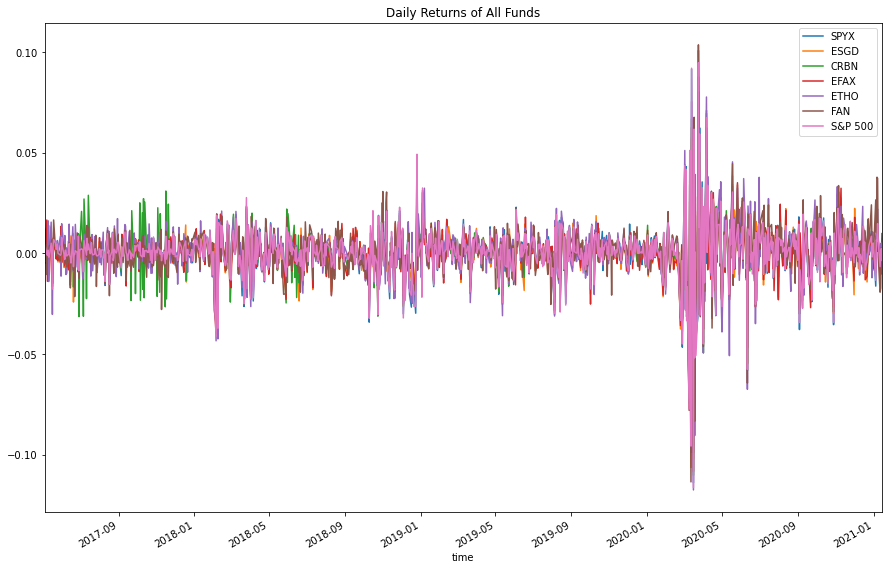

In [58]:
# Plot daily returns of all the funds
combined_daily_returns_df.plot(figsize=(15,10), title="Daily Returns of All Funds")

<AxesSubplot:title={'center':'Cumulative Returns of All Portfolios'}, xlabel='time'>

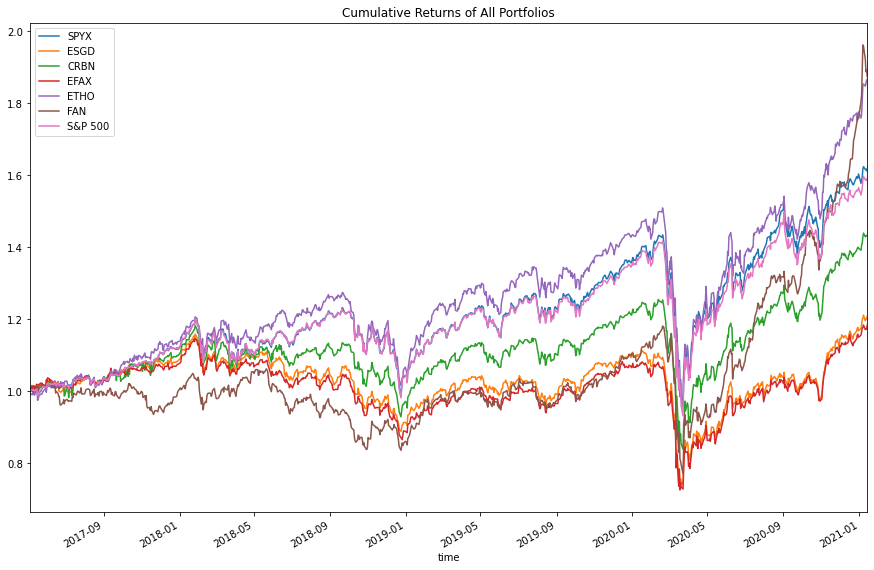

In [59]:
# Calculate and plot cumulative returns
cumulative_returns = (1 + combined_daily_returns_df).cumprod()

cumulative_returns.plot(figsize=(15,10), title="Cumulative Returns of All Funds")

<AxesSubplot:>

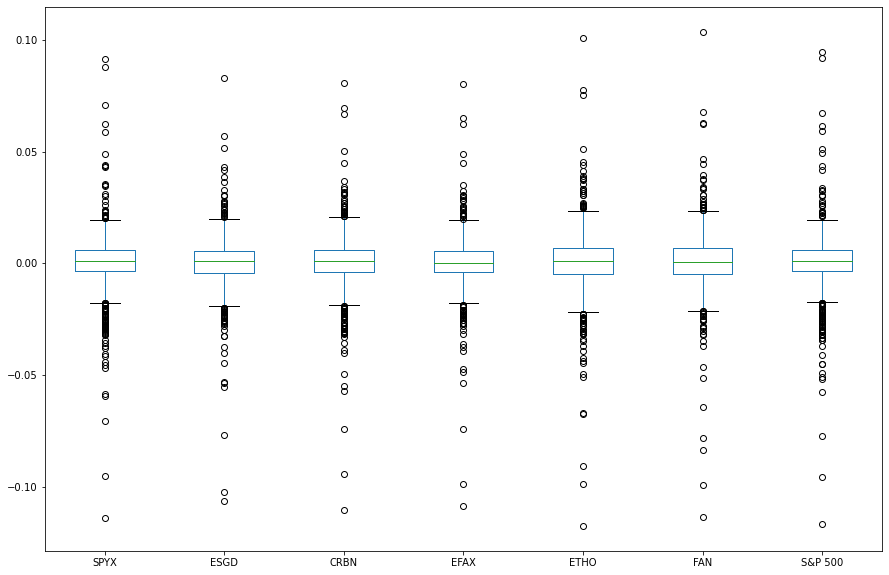

In [60]:
# Create a box plot for each fund
combined_daily_returns_df.plot.box(figsize=(15,10))

In [61]:
# Calculate the daily standard deviations of the funds
combined_std = combined_daily_returns_df.std().sort_values(ascending=False)
combined_std

ETHO       0.014277
S&P 500    0.013323
SPYX       0.013284
FAN        0.013249
CRBN       0.012853
ESGD       0.011892
EFAX       0.011759
dtype: float64

In [62]:
# Calculate the annualized standard deviations
annualized_std = (combined_std * np.sqrt(252)).sort_values(ascending=False)
annualized_std

ETHO       0.226636
S&P 500    0.211498
SPYX       0.210869
FAN        0.210316
CRBN       0.204034
ESGD       0.188777
EFAX       0.186666
dtype: float64

### ETHO is the riskiest fund

### Rolling Statistics

<AxesSubplot:title={'center':'Rolling 21-Day STD of All Funds'}, xlabel='time'>

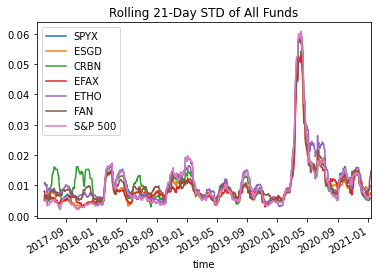

In [63]:
# Calculate and plot the rolling standard deviation for the portfolios using a 21-day window
rolling_std_21 = combined_daily_returns_df.rolling(window=21).std()

rolling_std_21.plot(title="Rolling 21-Day STD of All Funds")

### Correlation

In [64]:
# Calculate the correlation and display the correlation matrix
correlation = combined_daily_returns_df.corr()

correlation

,SPYX,ESGD,CRBN,EFAX,ETHO,FAN,S&P 500
SPYX,1.000000,0.878458,0.912665,0.785165,0.884561,0.791691,0.985262
ESGD,0.878458,1.000000,0.898554,0.896496,0.830910,0.857048,0.885552
CRBN,0.912665,0.898554,1.000000,0.813793,0.846448,0.793213,0.914496
EFAX,0.785165,0.896496,0.813793,1.000000,0.787666,0.792149,0.788776
ETHO,0.884561,0.830910,0.846448,0.787666,1.000000,0.770417,0.878747
FAN,0.791691,0.857048,0.793213,0.792149,0.770417,1.000000,0.797931
S&P 500,0.985262,0.885552,0.914496,0.788776,0.878747,0.797931,1.000000


### Beta

In [69]:
# Calculate beta of a single fund
covariance_etho = combined_daily_returns_df['ETHO'].cov(combined_daily_returns_df['S&P 500'])
variance = combined_daily_returns_df['S&P 500'].var()
etho_beta = covariance_fan / variance
etho_beta

0.7934685642164512

### Sharpe Ratios

In [67]:
all_sharpe_ratios = (combined_daily_returns_df.mean() * 252 / (combined_daily_returns_df.std() * np.sqrt(252)))
all_sharpe_ratios = all_sharpe_ratios.sort_values(ascending=False)
all_sharpe_ratios

FAN        0.914653
ETHO       0.858536
SPYX       0.718153
S&P 500    0.696142
CRBN       0.579090
ESGD       0.367508
EFAX       0.339107
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

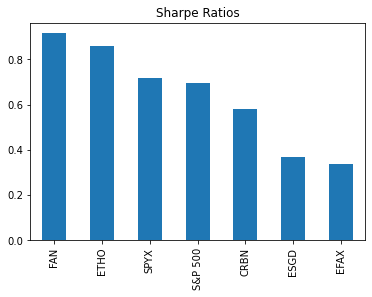

In [68]:
all_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")